<div style="background-color: gray; padding: 7px; text-align: center;">
    <h2>Análise Exploratória de Dados com Python e SQL</h2>
</div>

(breve descrição do que foi feito e do dataset)

### Ferramentas:
- Git 
- PandaSQL 
- SQLAlchemy 
- PostgreSQL 
- pgAdmin4

### Referências:
- https://pandas.pydata.org
- https://www.postgresql.org
- https://pypi.org/project/pandasql/
- https://pypi.org/project/psycopg2/
- https://docs.sqlalchemy.org/en/20/
- https://learnsql.com/blog/how-to-import-csv-to-postgresql/

---

#
<div style="background-color: gray; padding: 7px;">
    <h2> 1. Construção do Banco de Dados no PostgreSQL 
</div>

Para permitir o uso do banco de dados escolhido de forma relacional utilizando SQL, primeiro devemos criá-lo em um Sistema de Gerenciamento de Banco de Dados (SGBD). 

Nesse projeto, utilizamos o `PosgreSQL` e sua interace `pgAdmin`. Esse SGBD é amplamente utilizado por ser de código aberto, confiável e permitir escalabilidade.

Abaixo, disponibilizamos os comandos necessários para criar as tabelas utilizadas aqui, com as definições de `tipos de dados dos registros` e das `PRIMARY-KEYS` e `FOREIGN-KEYS`.

Uma vez definidas no sistema, podemos importar os arquivos .csv para cada tabela por meio da interface do pgAdmin.

### Comandos em SQL para criação das tabelas

``` 
CREATE TABLE categorias 
( 
 id_categoria INTEGER PRIMARY KEY,  -- Identificador único para cada categoria
 nome_categoria VARCHAR(255)  -- Nome da categoria
);

CREATE TABLE clientes 
( 
 id_cliente INTEGER PRIMARY KEY,  -- Identificador único para cada cliente
 nome_cliente VARCHAR(255),  -- Nome do cliente
 idade INTEGER,  -- Idade do cliente
 endereco VARCHAR(255)  -- Endereço do cliente
);

CREATE TABLE fornecedores 
( 
 id_fornecedor INTEGER PRIMARY KEY,  -- Identificador único para cada fornecedor
 nome VARCHAR(255),  -- Nome do fornecedor
 contato VARCHAR(255)  -- Contato do fornecedor (pode ser telefone, email, etc.)
);

CREATE TABLE marcas 
( 
 id_marca INTEGER PRIMARY KEY,  -- Identificador único para cada marca
 nome VARCHAR(255)  -- Nome da marca
);

CREATE TABLE produtos 
( 
 id_produto INTEGER PRIMARY KEY,  -- Identificador único para cada produto
 nome_produto VARCHAR(255),  -- Nome do produto
 preco REAL,  -- Preço do produto
 categoria_id INTEGER,  -- Referência à categoria do produto
 marca_id INTEGER,  -- Referência à marca do produto
 fornecedor_id INTEGER,  -- Referência ao fornecedor do produto
 data_estoque DATE,  -- Data de entrada do produto no estoque
 status VARCHAR(255),  -- Status atual do produto (por exemplo, disponível, esgotado)
 FOREIGN KEY(categoria_id) REFERENCES categorias (id_categoria),  -- Chave estrangeira para a tabela Categorias
 FOREIGN KEY(marca_id) REFERENCES marcas (id_marca),  -- Chave estrangeira para a tabela Marcas
 FOREIGN KEY(fornecedor_id) REFERENCES fornecedores (id_fornecedor)  -- Chave estrangeira para a tabela Fornecedores
);

CREATE TABLE vendas 
( 
 id_venda INTEGER PRIMARY KEY,  -- Identificador único para cada venda
 data_venda DATE,  -- Data em que a venda foi realizada
 total_venda REAL,  -- Valor total da venda
 cliente_id INTEGER,  -- Referência ao cliente que fez a compra
 FOREIGN KEY(cliente_id) REFERENCES clientes (id_cliente)  -- Chave estrangeira para a tabela Clientes
);

CREATE TABLE itens_venda 
( 
 venda_id INTEGER,  -- Referência à venda
 produto_id INTEGER,  -- Referência ao produto vendido
 PRIMARY KEY (venda_id, produto_id),  -- Chave primária composta pelas referências à venda e ao produto
 FOREIGN KEY(venda_id) REFERENCES vendas (id_venda),  -- Chave estrangeira para a tabela Vendas
 FOREIGN KEY(produto_id) REFERENCES produtos (id_produto)  -- Chave estrangeira para a tabela Produtos
);
```

---

#
<div style="background-color: gray; padding: 7px;">
    <h2> 2. Conexão do BD com o Jupyter Notebook
</div>

In [127]:
# Importando Bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sqlalchemy import create_engine

In [125]:
# Configurando Conexão com o Banco de Dados no PostgreSQL

USER = "postgres"   # Usuário cadastrado
SENHA = "postgres"  # Senha
HOST = "localhost"  # Host do servidor PostgreSQL
DATABASE = "black"  # Nome do banco de dados

engine = create_engine(f"postgresql+psycopg2://{USER}:{SENHA}@{HOST}/{DATABASE}")

---

#
<div style="background-color: gray; padding: 10px;">
    <h2> 3. Exploração Inicial dos Dados
</div>

Realizamos uma análise inicial para cada tabela contida no BD buscando entender os tipos de informações armazenadas. Para isso, utilizamos tanto queries do SQL quanto funções da biblioteca Pandas.

### Tabela categorias

In [3]:
query = """
SELECT * FROM categorias
"""

df = pd.read_sql_query(query, con = engine)
print(f'Shape da tabela categorias {df.shape}')
df

Shape da tabela categorias (5, 2)


,id_categoria,nome_categoria
0,1,Eletrônicos
1,2,Vestuário
2,3,Alimentos
3,4,Livros
4,5,Esportes


Essa é uma tabela dimensão que armazena atributos das categorias de produtos desse negócio. O `id_categoria`, que é a `PRIMARY-KEY`, é o identificador único do tipo ``Int`` para cada categoria distinta presente, cujos nomes são representados por `nome_categoria` do tipo ``Object``.

Com o `df.shape` sabemos que essa tabela tem 5 linhas e 2 colunas.

Observamos que há somente 5 categorias: Eletrônicos, Vestuário, Alimentos, Livros e Esportes.

Utilizando o comando `DataFrame.info()` da biblioteca `pandas`, verificamos os tipos de dados de cada coluna da tabela convertida em dataframe.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_categoria    5 non-null      int64 
 1   nome_categoria  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


Também podemos usar o comando `DataFrame.isnull().sum()` para verificar se temos dados faltantes. 

Nessa tabela, não há dados faltantes.

In [5]:
df.isnull().sum()

id_categoria      0
nome_categoria    0
dtype: int64

---

### Tabela clientes

In [6]:
query = """
SELECT * FROM clientes
"""

df = pd.read_sql_query(query, con = engine)
print(f'Shape da tabela clientes {df.shape}')
df.head()

Shape da tabela clientes (10000, 4)


,id_cliente,nome_cliente,idade,endereco
0,1,Carla,50,PR
1,2,Felipe,36,RJ
2,3,Elena,42,DF
3,4,Alice,29,PA
4,5,Alice,44,MA


A tabela clientes contém os atributos de nome, idade e endereço de cada cliente desse negócio, sendo `id_cliente` a `PRIMARY KEY`.

Aqui, temos 10.000 linhas e 4 colunas, cujos tipos de dados podemos observar a seguir:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_cliente    10000 non-null  int64 
 1   nome_cliente  10000 non-null  object
 2   idade         10000 non-null  int64 
 3   endereco      10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


Nesta tabela não temos dados faltantes.

In [8]:
df.isnull().sum()

id_cliente      0
nome_cliente    0
idade           0
endereco        0
dtype: int64

---

### Tabela fornecedores

In [9]:
query = """
SELECT * FROM fornecedores
"""

df = pd.read_sql_query(query, con = engine)
print(f'Shape da tabela fornecedores {df.shape}')
df.head()

Shape da tabela fornecedores (10, 3)


,id_fornecedor,nome,contato
0,1,AstroSupply,contato@astrosupply.com
1,2,HorizonDistributors,contato@horizondistributors.com
2,3,EchoLogistics,contato@echologistics.com
3,4,CosmicConnections,contato@cosmicconnections.com
4,5,TerraTrade,contato@terratrade.com


Essa tabela representa os fornecedores, identificados pela `PRIMARY KEY` em `id_fornecedor` e com informações de nome e contato para cada um deles. 

Pelo tamanho dessa, vemos que há 10 fornecedores presentes.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_fornecedor  10 non-null     int64 
 1   nome           10 non-null     object
 2   contato        10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


Também não possuimos dados faltantes nessa tabela.

In [11]:
df.isnull().sum()

id_fornecedor    0
nome             0
contato          0
dtype: int64

---

### Tabela marcas

In [12]:
query = """
SELECT * FROM marcas
"""

df = pd.read_sql_query(query, con = engine)
print(f'Shape da tabela marcas {df.shape}')
df

Shape da tabela marcas (10, 2)


,id_marca,nome
0,1,BluePeak
1,2,ZenithWave
2,3,SolarFlare
3,4,EchoBloom
4,5,CrystalCrest
5,6,NovaSphere
6,7,GreenPulse
7,8,SilverStream
8,9,AmberField
9,10,InfinityAura


Essa tabela representa as marcas dos produtos, identificados pela `PRIMARY KEY` em `id_marca` com informações de nome.

Pelo tamanho, vemos que há 10 marcas de produtos distintas.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id_marca  10 non-null     int64 
 1   nome      10 non-null     object
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


Também não possuimos dados faltantes nessa tabela.

In [14]:
df.isnull().sum()

id_marca    0
nome        0
dtype: int64

---

### Tabela produtos

In [15]:
query = """
SELECT * FROM produtos
"""

df = pd.read_sql_query(query, con = engine)
df.tail(5)

,id_produto,nome_produto,preco,categoria_id,marca_id,fornecedor_id,data_estoque,status
9995,9996,Livro de Ficção,1567.81,5,9,1,2021-12-25,Vendido
9996,9997,Celular,1690.56,5,10,9,2020-10-19,Vendido
9997,9998,Celular,1278.29,2,9,5,2022-04-07,Vendido
9998,9999,Livro de Ficção,521.94,1,2,7,2021-04-23,Estoque
9999,10000,Livro de Ficção,1075.08,5,7,6,2023-08-15,Vendido


Essa tabela representa os produtos, identificados pela `PRIMARY-KEY` em `id_produto` e informações de nome em ``nome_produto``

 O ``preço`` do produto é representado por uma coluna do tipo ``Float``. 

Além disso, temos ``categoria_id``, ``categoria_id`` e ``categoria_id``, que são ``FOREIGN-KEYS`` referentes a outras tabelas. 

A coluna ``data_estoque`` indica a data em que o produto foi adicionado ao estoque e a coluna ``status`` indica se um produto foi vendido ou ainda está em estoque, ambas do tipo ``Object``.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_produto     10000 non-null  int64  
 1   nome_produto   10000 non-null  object 
 2   preco          10000 non-null  float64
 3   categoria_id   10000 non-null  int64  
 4   marca_id       10000 non-null  int64  
 5   fornecedor_id  10000 non-null  int64  
 6   data_estoque   10000 non-null  object 
 7   status         10000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 625.1+ KB


Não possuimos dados faltantes na tabela de produtos. 

In [17]:
df.isnull().sum()

id_produto       0
nome_produto     0
preco            0
categoria_id     0
marca_id         0
fornecedor_id    0
data_estoque     0
status           0
dtype: int64

---

### Tabela vendas

In [18]:
query = """
SELECT * FROM vendas
"""

df = pd.read_sql_query(query, con = engine)
df.head()

,id_venda,data_venda,total_venda,cliente_id
0,1,2021-05-01,167.21,8112
1,2,2023-01-12,1315.33,76
2,3,2023-06-09,3044.65,1285
3,4,2021-01-31,4576.87,3897
4,5,2022-02-09,3429.25,2749


Aqui temos ``id_venda``, que é a ``PRIMARY-KEY`` desta tabela, junto com a ``data_venda``, que é data da compra.

Também temos ``total_venda``, que representa o valor do somatório dos preços dos produtos adquiridos numa mesma compra.

Por fim, o ``cliente_id``, que é uma ``FOREIGN-KEY`` da tabela clientes.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venda     50000 non-null  int64  
 1   data_venda   50000 non-null  object 
 2   total_venda  50000 non-null  float64
 3   cliente_id   50000 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.5+ MB


Não possuimos dados faltantes na tabela de vendas. 

In [20]:
df.isnull().sum()

id_venda       0
data_venda     0
total_venda    0
cliente_id     0
dtype: int64

---

### Tabela itens_venda

In [21]:
query = """
SELECT * FROM itens_venda
"""

df = pd.read_sql_query(query, con = engine)
df.head()

,venda_id,produto_id
0,1,1510
1,2,1762
2,3,6889
3,3,5477
4,3,2181


Por fim, a tabela ``itens_venda`` é uma tabela fato, cuja função é relacionar ``venda_id`` a ``produto_id``, informando quais foram os produtos adquiridos em cada venda.

---

#
<div style="background-color: gray; padding: 10px;">
    <h2> 4. Análise Exploratória
</div>

(Há espaço pra melhoras nesse texto)

A partir da exploração inicial do dataset, podemos definir os objetivos desse projeto que visem gerar insights valiosos ao negócio.

- Relacionar quantidade de vendas por Ano/Mes (OK)
- Identificar sazonalidades (OK)
- Comparar os anos (OK)

- Quais marcas e fornecedores tiveram melhor e pior desempenho em termos de volume de vendas. (OK)
- Quais categorias tiveram melhor e pior desempenho em termos de volume de vendas. (OK)
- Comparar desempenho de fornecedores durante o periodo (OK)
- Plotar gráficos fornecedores x periodo (OK)
- Plotar gráfico de pizza de categoria x vendas (OK) 

##
<div style="background-color: gray; padding: 0px;">
    <h2> 3.1 Sazonalidade das Vendas
</div>


In [22]:
query = """
SELECT 
CAST(EXTRACT(year FROM data_venda) AS INTEGER) AS Ano, 
CAST(EXTRACT(month FROM data_venda) AS INTEGER) AS Mes,
TO_CHAR(data_venda, 'YYYY/MM') AS "ano/mes",
COUNT(*) as qtd_vendas
FROM vendas
GROUP BY 1, 2, 3
ORDER BY ano, mes
"""

df = pd.read_sql_query(query, con = engine)
df.head()

,ano,mes,ano/mes,qtd_vendas
0,2020,1,2020/01,1070
1,2020,2,2020/02,537
2,2020,3,2020/03,549
3,2020,4,2020/04,554
4,2020,5,2020/05,877


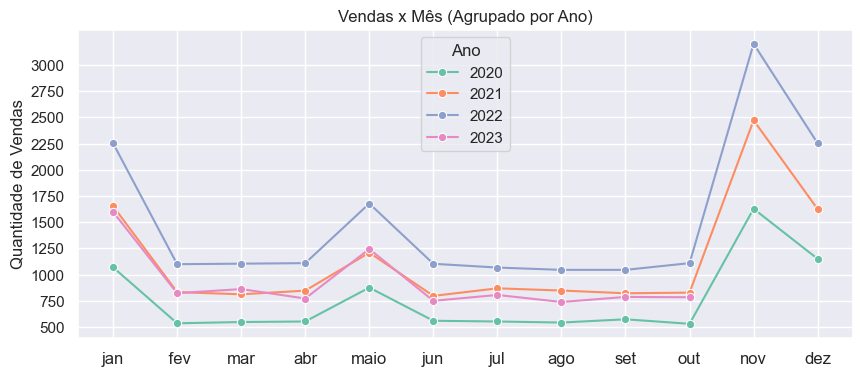

In [23]:
def grafico_vendas():
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=(10, 4))
    sns.lineplot(df, x="mes", y="qtd_vendas", hue="ano", marker="o", palette="Set2")
    plt.xlabel("")
    plt.ylabel("Quantidade de Vendas")
    plt.title("Vendas x Mês (Agrupado por Ano)")
    plt.xticks(range(1, 13), ['jan', ' fev', 'mar', 'abr', 'maio', 'jun', 'jul','ago', 'set', 'out', 'nov', 'dez'], fontsize=12)
    plt.yticks(np.arange(500, 3250, 250))
    plt.legend(title="Ano")
    return plt.show()
grafico_vendas()

Buscando entender o comportamento dos clientes ao longo do ano, através deste gráfico conseguimos observar uma tendência de compra nos mêses de ``Janeiro``, ``Maio``, ``Novembro`` e ``Dezembro``.

In [24]:
query = """
WITH periodo AS (
    SELECT 
    CAST(EXTRACT(year FROM data_venda) AS INTEGER) AS Ano, 
    CAST(EXTRACT(month FROM data_venda) AS INTEGER) AS Mes,
    TO_CHAR(data_venda, 'YYYY/MM') AS "ano/mes",
    COUNT(*) as qtd_vendas
    FROM vendas
    GROUP BY 1, 2, 3
    ORDER BY ano, mes
)

SELECT * FROM periodo
WHERE ano IN (2022,2023)
"""

df = pd.read_sql_query(query, con = engine)

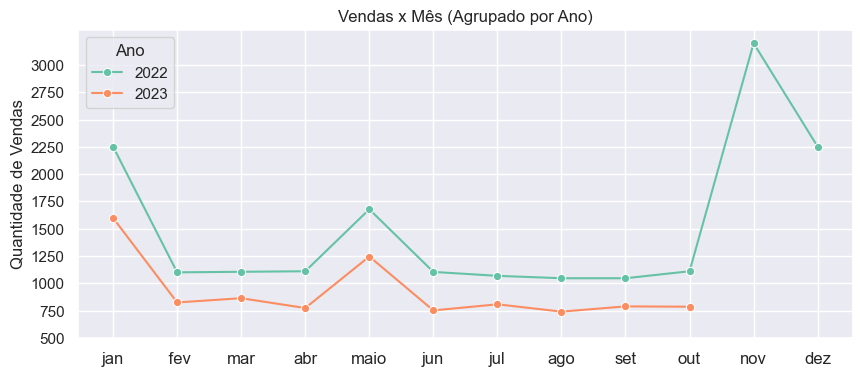

In [25]:
grafico_vendas()

Também conseguimos analisar que o ano de 2023, em vendas, performou pior quando comparado ao ano anterior (2022) por mais que ainda não possuímos dados sobre Novembro e Dezembro de 2023.

Para melhorar nossos resultados devemos analisar todos fatores internos e externos, começando com a nossa relaçao de vendas por categoria de produto, para descobrir quais categorias devemos evitar ou dar mais ênfase nos mêses 11 e 12.

##
<div style="background-color: gray; padding: 0px;">
    <h2> 4.1 Performance das Vendas
</div>
                 

### Desempenho de Vendas das Categorias

In [165]:
query = """
WITH total_vendas AS (
    SELECT COUNT(venda_id) AS total_vendas_geral FROM itens_venda
    )

SELECT 
    c.id_categoria,
    c.nome_categoria,
    COUNT(it.venda_id) AS total_de_vendas_categoria,
    ROUND((COUNT(it.venda_id) * 100.0) / total_vendas.total_vendas_geral, 2) AS percentual_vendas_categoria
FROM 
    itens_venda AS it
LEFT JOIN 
    produtos AS p ON p.id_produto = it.produto_id
LEFT JOIN 
    categorias AS c ON c.id_categoria = p.categoria_id
CROSS JOIN 
    total_vendas
GROUP BY 
    c.id_categoria, c.nome_categoria, total_vendas.total_vendas_geral
ORDER BY 
    total_de_vendas_categoria DESC;
"""

df = pd.read_sql_query(query, con=engine)
df

,id_categoria,nome_categoria,total_de_vendas_categoria,percentual_vendas_categoria
0,1,Eletrônicos,43446,28.96
1,2,Vestuário,41274,27.51
2,3,Alimentos,21922,14.61
3,5,Esportes,21782,14.52
4,4,Livros,21610,14.40


A consulta nos informa, em valores absolutos e percentuais de volumes de vendas, que a categoria `mais vendida` é a de `Eletrônicos`, enquanto a `menos vendida` é a de `Livros`.

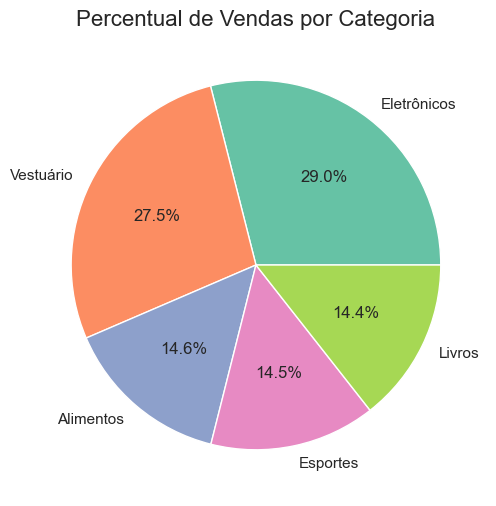

In [166]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Set2')[0:5]
plt.pie(df['total_de_vendas_categoria'], labels=df['nome_categoria'], colors = colors, autopct='%1.1f%%')
plt.title('Percentual de Vendas por Categoria', fontsize=16)
plt.show()

A partir deste gráfico, percebemos que as categorias de `Eletrônicos` e `Vestuário` representam `mais de 50%` de todas as vendas.

### Desempenho de Vendas das Marcas

In [163]:
query = """
WITH total_vendas AS (
    SELECT COUNT(venda_id) AS total_vendas_geral FROM itens_venda
    )

SELECT 
    m.id_marca,
    m.nome,
    COUNT(it.venda_id) AS total_de_vendas_marca,
    ROUND((COUNT(it.venda_id) * 100.0) / total_vendas.total_vendas_geral, 2) AS percentual_vendas_marca
FROM 
    itens_venda AS it
LEFT JOIN 
    produtos AS p ON p.id_produto = it.produto_id
LEFT JOIN 
    marcas AS m ON m.id_marca = p.marca_id
CROSS JOIN 
    total_vendas
GROUP BY 
    m.id_marca, m.nome, total_vendas.total_vendas_geral
ORDER BY 
    total_de_vendas_marca DESC;
"""

df = pd.read_sql_query(query, con=engine)
df

,id_marca,nome,total_de_vendas_marca,percentual_vendas_marca
0,1,BluePeak,32059,21.37
1,3,SolarFlare,22012,14.67
2,2,ZenithWave,21762,14.50
3,7,GreenPulse,10902,7.27
4,6,NovaSphere,10796,7.20
5,4,EchoBloom,10785,7.19
6,5,CrystalCrest,10714,7.14
7,8,SilverStream,10627,7.08
8,10,InfinityAura,10483,6.99
9,9,AmberField,9894,6.59


A consulta nos informa, em valores absolutos e percentuais de volumes de vendas, que a marca `mais vendida` é a de `BluePeak`, enquanto a `menos vendida` é a de `AmberField`.

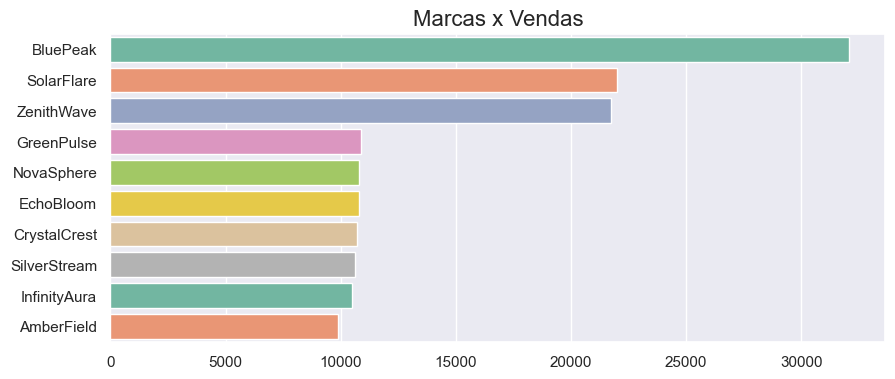

In [164]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 4))
sns.barplot(df, x="total_de_vendas_marca", hue='nome',y="nome", palette="Set2")
plt.xlabel("")
plt.ylabel("")
plt.title("Marcas x Vendas", fontsize=16)
plt.show()

A partir desse gráfico, percebemos que as marcas `BluePeak`, `SolarFlare` e `ZeinithWave` são as que mais representam em total de vendas.

### Desempenho de Vendas dos Fornecedores

In [130]:
query = """
WITH total_vendas AS (
    SELECT COUNT(venda_id) AS total_vendas_geral FROM itens_venda
    )

SELECT 
    f.id_fornecedor,
    f.nome,
    COUNT(it.venda_id) AS total_de_vendas_fornecedor,
    ROUND((COUNT(it.venda_id) * 100.0) / total_vendas.total_vendas_geral, 2) AS percentual_vendas_fornecedor
FROM 
    itens_venda AS it
LEFT JOIN 
    produtos AS p ON p.id_produto = it.produto_id
LEFT JOIN 
    fornecedores AS f ON f.id_fornecedor = p.fornecedor_id
CROSS JOIN 
    total_vendas
GROUP BY 
    f.id_fornecedor, f.nome, total_vendas.total_vendas_geral
ORDER BY 
    percentual_vendas_fornecedor DESC;
"""

df = pd.read_sql_query(query, con=engine)
df

,id_fornecedor,nome,total_de_vendas_fornecedor,percentual_vendas_fornecedor
0,2,HorizonDistributors,28062,18.70
1,1,AstroSupply,28022,18.68
2,4,CosmicConnections,19179,12.78
3,3,EchoLogistics,19080,12.72
4,10,InfinityImports,9955,6.64
5,6,PinnaclePartners,9419,6.28
6,5,TerraTrade,9206,6.14
7,9,SummitSolutions,9175,6.12
8,7,NebulaNetworks,9020,6.01
9,8,OceanicOrigins,8916,5.94


A consulta nos informa, em valores absolutos e percentuais de volumes de vendas, que as marcas `mais vendidas` são a `HorizonDistributors` e `AstroSupply`, enquanto as `menos vendidas` são a `NebulaNetworks` e `OceanicOrigins`.

In [132]:
query = """
SELECT 
    CAST(EXTRACT(year FROM data_venda) AS INTEGER) AS Ano,
    CAST(EXTRACT(month FROM data_venda) AS INTEGER) AS Mes, 
    TO_CHAR(data_venda, 'YYYY/MM') AS "ano/mes",
    f.nome,
    COUNT(iv.venda_id) AS qtd_vendas
FROM 
    itens_venda AS iv
JOIN 
    vendas AS v ON v.id_venda = iv.venda_id
JOIN 
    produtos AS p ON p.id_produto = iv.produto_id
JOIN 
    fornecedores AS f ON f.id_fornecedor = p.fornecedor_id
WHERE 
    f.nome IN ('HorizonDistributors', 'AstroSupply', 'NebulaNetworks', 'OceanicOrigins')
GROUP BY 
    4, 3, 2, 1
ORDER BY 
    Ano, Mes , "ano/mes"
"""

query_2 = f"""
SELECT *
FROM ({query})
WHERE mes = 1
"""

df = pd.read_sql_query(query, con = engine)
df_mes = pd.read_sql_query(query_2, con = engine)

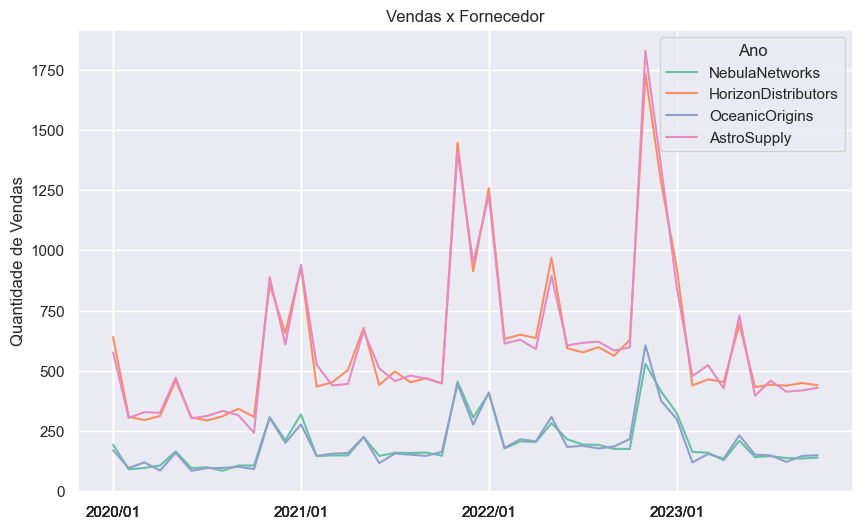

In [133]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(df, x="ano/mes", y="qtd_vendas", hue="nome", palette="Set2")
plt.xticks(ticks=df_mes['ano/mes'])
plt.xlabel("")
plt.ylabel("Quantidade de Vendas")
plt.title("Vendas x Fornecedor")
plt.legend(title="Ano")
plt.show()